<a href="https://colab.research.google.com/github/sauumyaaa/breastCancerCNN/blob/master/CNN_for_breast_cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## setup & installations


In [ ]:
!pip install tensorflow-gpu==2.8.0rc0
#installing TensorFlow with GPU support specifically version 2.8.0 release candidate 0.

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



# data preprocessing

In [ ]:
from sklearn import datasets,metrics
cancer=datasets.load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
#independent variables or matrix of features
x=pd.DataFrame(data=cancer.data,columns=cancer.feature_names)

x.tail()#last 5

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [ ]:
#dependent var
y=cancer.target
print(y)
print()

print(cancer.target_names)
print()
#0 for malignant & 1 for benign

x.shape, y.shape

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

((569, 30), (569,))

In [ ]:
#splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train.shape,x_test.shape
#80% to train , 20% to test



In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


In [ ]:
print(x_train)
#we see that the values are scaled now
x_train.shape,x_test.shape
#to process the dataset we have to change dimension from 1d to 2d



In [ ]:
x_train=x_train.reshape(455,30,1)
x_test=x_test.reshape(114,30,1)
x_train.shape,x_test.shape
#we see it's 2d now

((455, 30, 1), (114, 30, 1))

# model building

In [ ]:
model=tf.keras.models.Sequential() #defining an object

In [ ]:
#first cnn layer
model.add(tf.keras.layers.Conv1D(filters=32,kernel_size=2,activation='relu',input_shape=(30,1)))# 4 params

#batch normalization
#The batch normalization allows each layer of network to learn by itself a little bit more independent
#of other layers.. due to the batch normalization data processing speeds up
model.add(tf.keras.layers.BatchNormalization())

#dropout layer
model.add(tf.keras.layers.Dropout(0.2))
#percentage of neurons we are ignoring during training process 20%
#adding dropout layer is a regularization technique



In [ ]:
#second cnn layer
model.add(tf.keras.layers.Conv1D(filters=64,kernel_size=2,activation='relu'))
#we have increased num of filters in this layer

#batch normalization
model.add(tf.keras.layers.BatchNormalization())

#dropout layer
model.add(tf.keras.layers.Dropout(0.4))


In [ ]:
#flatten layer
model.add(tf.keras.layers.Flatten())

In [ ]:
#dense layer
#this is fully connected layer
model.add(tf.keras.layers.Dense(units=64,activation='relu'))

#output layer
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
#binary output

In [ ]:
model.summary()
#first convulutional layer, bn, dropout. second cl,bn,d. flatten,dense(fully connected),output

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 32)            96        
                                                                 
 batch_normalization (BatchN  (None, 29, 32)           128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 29, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 28, 64)            0

In [ ]:
#compile model

opt=tf.keras.optimizers.Adam(learning_rate=0.00005) #defining a var for optimizer
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

# model training

In [ ]:
history=model.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test))


Epoch 1/50
15/15 [==============================] - 0s 14ms/step - loss: 0.0676 - accuracy: 0.9714 - val_loss: 0.0581 - val_accuracy: 0.9737
Epoch 2/50
15/15 [==============================] - 0s 11ms/step - loss: 0.0521 - accuracy: 0.9824 - val_loss: 0.0586 - val_accuracy: 0.9737
Epoch 3/50
15/15 [==============================] - 0s 12ms/step - loss: 0.0628 - accuracy: 0.9802 - val_loss: 0.0582 - val_accuracy: 0.9737
Epoch 4/50
15/15 [==============================] - 0s 12ms/step - loss: 0.0474 - accuracy: 0.9868 - val_loss: 0.0603 - val_accuracy: 0.9737
Epoch 5/50
15/15 [==============================] - 0s 11ms/step - loss: 0.0548 - accuracy: 0.9824 - val_loss: 0.0630 - val_accuracy: 0.9737
Epoch 6/50
15/15 [==============================] - 0s 23ms/step - loss: 0.0610 - accuracy: 0.9802 - val_loss: 0.0633 - val_accuracy: 0.9737
Epoch 7/50
15/15 [==============================] - 0s 22ms/step - loss: 0.0578 - accuracy: 0.9758 - val_loss: 0.0623 - val_accuracy: 0.9737
Epoch 8/50
15

In [ ]:
#we see above that at the end of 50 epochs .. validation accuracy is 96.49 percent and training accuracy is 97.58

# model prediction

In [ ]:
#with the help of variable y_pred.. we are making individual predictions
threshold=0.5;
y_pred=(model.predict(x_test) > threshold).astype("int32")

In [ ]:
print(y_pred[49],print(y_test[49]))

0
[0] None


In [ ]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[44  3]
 [ 0 67]]


In [ ]:
acc_cm=accuracy_score(y_test,y_pred)
print(acc_cm)
#accuracy score is same as validation accuracy

0.9736842105263158


# learning curve

In [ ]:
def learning_curve(history,epoch): #defining a function

  #training vs validation accuracy
  epoch_range=range(1,epoch+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','val'],loc='upper left')
  plt.show()

  #training vs validation loss
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','val'],loc='upper left')
  plt.show()


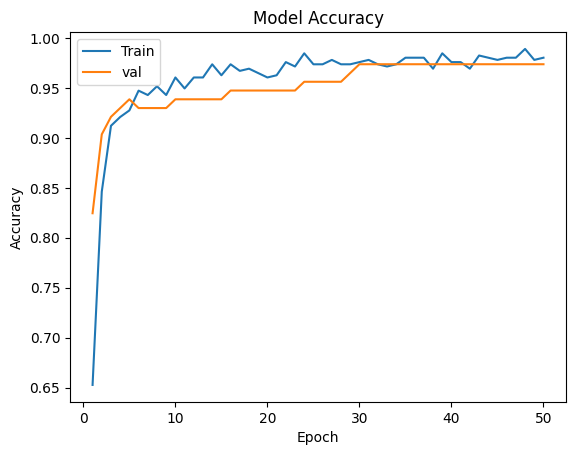

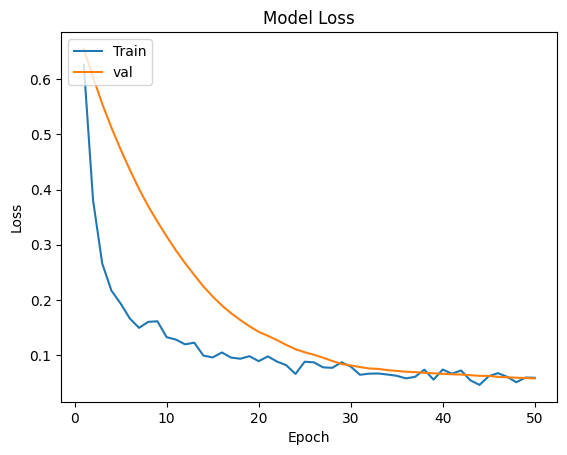

In [ ]:
learning_curve(history,50)

both training and validation accuracy are increasing.
both training and validation loss are decreasing. meaning our model is not over or under fitted .it's working fine.
